In [1]:
import mysql.connector
import re

db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "root",
    database = "CSCI_630_GA2"
    )

mycursor = db.cursor()


In [24]:
# for i in range(1, 10):
#     for j in ["both","male","female"]:
#         mycursor.execute(f"DROP TABLE table_1_{i}_{j}")

In [25]:
import pandas as pd

for i in range(1,10):

    file = f"Table1/table-1-{i}.xlsx"

    df = pd.read_excel(file, header = 5)

    df.iloc[:, 0] = df.iloc[:, 0].replace("\t", "", regex=True) 

    df = df.drop([0, 1, 3, 15, 16, 18, 30, 31, 33])

    df.replace('Z', 0, inplace=True)

    df.set_index(df.columns[0], inplace=True)

    both_sex = df.iloc[:12].copy()

    male = df.iloc[12:24].copy()

    female = df.iloc[24:36].copy()

    genders = {
    'both': both_sex,
    'male': male,
    'female': female
    }
    
    for gender_type, gender_data in genders.items():
        create_table_query = f"CREATE TABLE IF NOT EXISTS table_1_{i}_{gender_type} (`Age groups` VARCHAR(100), "
        count = 0
        for j in gender_data.columns:
            if count > 0:
                create_table_query += ", "
            else:
                count += 1
            create_table_query += "`" + j + "`" + " int UNSIGNED"

        create_table_query += ", PRIMARY KEY (`Age groups`))"
        mycursor.execute(create_table_query)
        db.commit()

        batch_size = 100;
        batch_i = 0
        
        vallist = []
        #placeholder = []
        for k in range(len(gender_data)):
            batch_i = batch_i + 1
            values = gender_data.iloc[k].tolist()
            values.insert(0,re.sub(r'^\s+', '', gender_data.index[k]))
            vallist.append(values)
            placeholders = ", ".join(['%s'] * len(values))
            query = (f"INSERT INTO table_1_{i}_{gender_type} VALUES ({placeholders})")
            if(batch_i % batch_size == 0):
                print(vallist)
                mycursor.executemany(query, vallist)
                db.commit()
        
        print(vallist)
        print(query)
        mycursor.executemany(query, vallist)
        db.commit()
            


[['18 to 24 years', 28981.0, 43.0, 42.0, 80.0, 200.0, 203.0, 459.0, 3432.0, 10065.0, 9113.0, 634.0, 1080.0, 3305.0, 279.0, 34.0, 11.0], ['25 to 29 years', 21747.0, 14.0, 36.0, 82.0, 188.0, 149.0, 166.0, 546.0, 6337.0, 3551.0, 815.0, 1252.0, 6390.0, 1804.0, 200.0, 217.0], ['30 to 34 years', 22836.0, 25.0, 58.0, 142.0, 187.0, 217.0, 247.0, 613.0, 5767.0, 3409.0, 922.0, 1544.0, 6344.0, 2567.0, 292.0, 504.0], ['35 to 39 years', 21992.0, 73.0, 85.0, 164.0, 244.0, 240.0, 274.0, 640.0, 5426.0, 3076.0, 911.0, 1369.0, 5786.0, 2762.0, 400.0, 543.0], ['40 to 44 years', 21198.0, 47.0, 124.0, 314.0, 282.0, 321.0, 280.0, 548.0, 5283.0, 2784.0, 916.0, 1219.0, 5395.0, 2734.0, 424.0, 524.0], ['45 to 49 years', 19430.0, 48.0, 107.0, 305.0, 280.0, 273.0, 243.0, 476.0, 4927.0, 2679.0, 966.0, 1115.0, 4713.0, 2539.0, 331.0, 427.0], ['50 to 54 years', 20700.0, 54.0, 133.0, 297.0, 299.0, 297.0, 227.0, 603.0, 5895.0, 2618.0, 995.0, 1196.0, 4979.0, 2377.0, 264.0, 467.0], ['55 to 59 years', 21004.0, 111.0, 168.0

IntegrityError: 1062 (23000): Duplicate entry '18 to 24 years' for key 'table_1_1_both.PRIMARY'

In [ ]:
mycursor.execute("SELECT * from table_1_1_both")
result = mycursor.fetchall()
for i in range(len(result)):
    print(result[i])

('18 to 24 years', 28981, 43, 42, 80, 200, 203, 459, 3432, 10065, 9113, 634, 1080, 3305, 279, 34, 11)
('25 to 29 years', 21747, 14, 36, 82, 188, 149, 166, 546, 6337, 3551, 815, 1252, 6390, 1804, 200, 217)
('30 to 34 years', 22836, 25, 58, 142, 187, 217, 247, 613, 5767, 3409, 922, 1544, 6344, 2567, 292, 504)
('35 to 39 years', 21992, 73, 85, 164, 244, 240, 274, 640, 5426, 3076, 911, 1369, 5786, 2762, 400, 543)
('40 to 44 years', 21198, 47, 124, 314, 282, 321, 280, 548, 5283, 2784, 916, 1219, 5395, 2734, 424, 524)
('45 to 49 years', 19430, 48, 107, 305, 280, 273, 243, 476, 4927, 2679, 966, 1115, 4713, 2539, 331, 427)
('50 to 54 years', 20700, 54, 133, 297, 299, 297, 227, 603, 5895, 2618, 995, 1196, 4979, 2377, 264, 467)
('55 to 59 years', 21004, 111, 168, 248, 258, 243, 299, 609, 6462, 2947, 1079, 1471, 4575, 1840, 257, 436)
('60 to 64 years', 21174, 74, 150, 277, 260, 223, 318, 689, 6791, 3183, 1026, 1318, 4324, 1840, 326, 374)
('65 to 69 years', 18533, 73, 134, 253, 271, 225, 236, 547,

In [3]:
mycursor.execute("DROP TABLE table_3")

In [4]:
import pandas as pd

file = "Table3/table-3.xlsx"

df = pd.read_excel(file, header = [3, 4])

df = df.replace("\t", "", regex=True)

df = df.replace('Z', 0)

df = df.drop([1, 10, 19, 21, 27, 33, 39])

df = df.iloc[:37]

df = df.set_index(df.columns[0])

# print(df)

number_columns = [col for i, col in enumerate(df.columns) if i % 2 == 0]

df.drop(columns=number_columns, inplace=True)

column_names = "Degree, "

create_table_query = f"CREATE TABLE IF NOT EXISTS table_3 (Degree VARCHAR(100), "
count = 0
for i in df.columns:
    print(i)
    if count > 0:
        create_table_query += ", "
        column_names += ", "
    else:
        count += 1
    create_table_query += "`" + i[0] + "`" + " int UNSIGNED"
    column_names += "`" + i[0] + "`"

# print(create_table_query)
create_table_query += ", id int PRIMARY KEY AUTO_INCREMENT)"
mycursor.execute(create_table_query)
db.commit()

batch_size = 100;
batch_i = 0

print(column_names)        
vallist = []
#placeholder = []
for k in range(len(df)):
    batch_i = batch_i + 1
    values = df.iloc[k].tolist()
    values.insert(0, re.sub(r'^\s+', '', df.index[k]))
    vallist.append(values)
    placeholders = ", ".join(['%s'] * len(values))
    query = (f"INSERT INTO table_3 ({column_names}) VALUES ({placeholders})")
    if(batch_i % batch_size == 0):
        print(vallist)
        mycursor.executemany(query, vallist)
        db.commit()
 
print(vallist)
mycursor.executemany(query, vallist)
db.commit()



('All people', 'Percent')
('Male', 'Percent')
('Female', 'Percent')
('25 to 34 years old', 'Percent')
('35 to 54 years old', 'Percent')
('55 years and older', 'Percent')
('White', 'Percent')
('Non-Hispanic White', 'Percent')
('Black', 'Percent')
('Asian', 'Percent')
('Hispanic (of any race)', 'Percent')
Degree, `All people`, `Male`, `Female`, `25 to 34 years old`, `35 to 54 years old`, `55 years and older`, `White`, `Non-Hispanic White`, `Black`, `Asian`, `Hispanic (of any race)`
[['Total', 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], ['Less than 1 year, no diploma', 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.9, 1.2], ['1st-4th grade, no diploma', 0.7, 0.7, 0.6, 0.2, 0.5, 0.9, 0.7, 0.1, 0.4, 0.7, 3.1], ['5th-6th grade, no diploma', 1.2, 1.2, 1.2, 0.5, 1.3, 1.5, 1.3, 0.2, 0.6, 1.4, 5.8], ['7th-8th grade, no diploma', 1.3, 1.4, 1.3, 0.8, 1.3, 1.5, 1.4, 0.7, 1.0, 1.4, 3.8], ['9th grade, no diploma', 1.2, 1.3, 1.1, 0.8, 1.4, 1.2, 1.2, 0.6, 1.0, 0.8, 3.9

In [ ]:
mycursor.execute("SELECT * from table_3 ORDER BY id")
result = mycursor.fetchall()
for i in range(len(result)):
    print(result[i])

('Total', 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1)
('Less than 1 year, no diploma', 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2)
('1st-4th grade, no diploma', 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 3, 3)
('5th-6th grade, no diploma', 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 6, 4)
('7th-8th grade, no diploma', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 5)
('9th grade, no diploma', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6)
('10th grade, no diploma', 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 7)
('11th grade, no diploma', 2, 2, 2, 1, 2, 2, 1, 1, 3, 0, 2, 8)
('12th grade, no diploma', 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 9)
('Less than 1 year, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10)
('1st-4th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11)
('5th-6th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12)
('7th-8th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13)
('9th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('10th grade, GED', 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 15)
('11th grade, GED', 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 16)
(

## TABLE 2

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "yash"
) 
print(mydb)

cursor = mydb.cursor()
cursor.execute("CREATE DATABASE CSCI_630_GA2")

In [ ]:
import mysql.connector
import pandas as pd

for i in range(1,4):
        file = f"Table2/table-2-{i}.xlsx"
        df_title = pd.read_excel(file, header=None)
        print("\033[1m" + "Title: " + df_title.iloc[3, 0]  + "\033[0m")
        
        df = pd.read_excel(file, header=5)
        df.iloc[:,0] = df.iloc[:,0].replace("\t", "", regex=True) 
        
        sections = {
            f'{df_title.iloc[3, 0]}_marital_status': (2, 7),
            f'{df_title.iloc[3, 0]}_household_relationship': (9, 18),
            f'{df_title.iloc[3, 0]}_citizenship': (20, 25),
            f'{df_title.iloc[3, 0]}_year_of_entry': (27, 32),
            f'{df_title.iloc[3, 0]}_labor_force_status': (34, 36),
            f'{df_title.iloc[3, 0]}_occupation': (38, 48),
            f'{df_title.iloc[3, 0]}_industry': (50, 63)
        }
        
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="yash",
            database="CSCI_630_GA2"
        )
        cursor = mydb.cursor()
        
        # Function to sanitize column names
        def sanitize(col_name):
            return col_name.replace(" ", "_").replace("-", "_").replace(".", "_").replace(",", "_").replace("(", "").replace(")", "").replace("'", "")
        def create_table(name, df_section):
            columns = df_section.columns
            sanitized_columns = [sanitize(col) for col in columns]
            column_heading = ", ".join([f"`{col}` VARCHAR(255)" for col in sanitized_columns])
            
            create_query = f"CREATE TABLE IF NOT EXISTS `{name}` (id INT AUTO_INCREMENT PRIMARY KEY, {column_heading})"
            cursor.execute(create_query)
            for _, row in df_section.iterrows():
                values = "', '".join(str(v).replace("'", "''") for v in row)  # escape single quotes in values
                insert_stmt = f"INSERT INTO `{name}` ({', '.join(sanitized_columns)}) VALUES ('{values}')"
                cursor.execute(insert_stmt)
            mydb.commit()
        for section, (start, end) in sections.items():
            df_section = df.iloc[start:end+1].copy()
            df_section.rename(columns={df_section.columns[0]: df.iloc[start-1, 0]}, inplace=True)
            create_table(section, df_section)
        
        cursor.close()
        mydb.close()


Title: Both Sexes
Title: Female
Title: Male


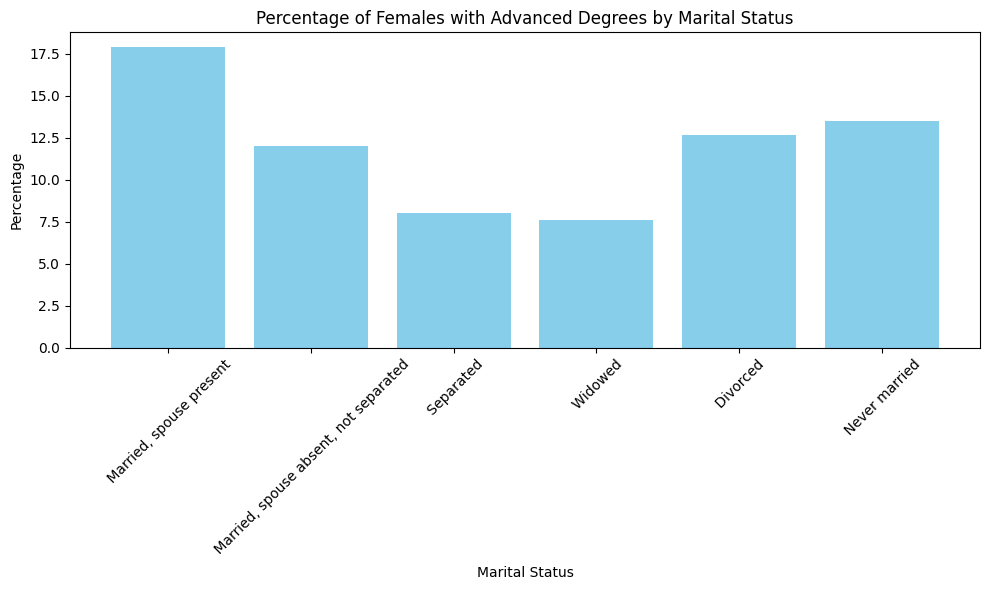

In [ ]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash",
    database="CSCI_630_GA2"
)
cursor = mydb.cursor()
query = """
SELECT 
    Marital_Status, 
    ROUND(((Masters_degree + Professional_degree + Doctoral_degree) / Total) * 100, 2) AS Percentage
FROM 
    female_marital_status;
"""

cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result, columns=['Marital_Status', 'Percentage'])

plt.figure(figsize=(10, 6))
plt.bar(df['Marital_Status'], df['Percentage'], color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Percentage of Females with Advanced Degrees by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cursor.close()
mydb.close()

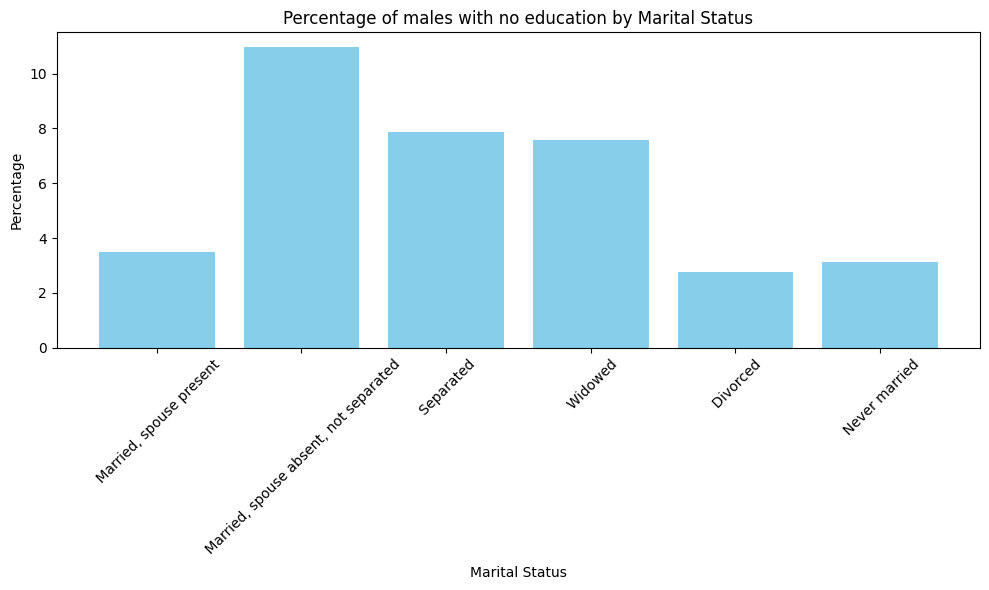

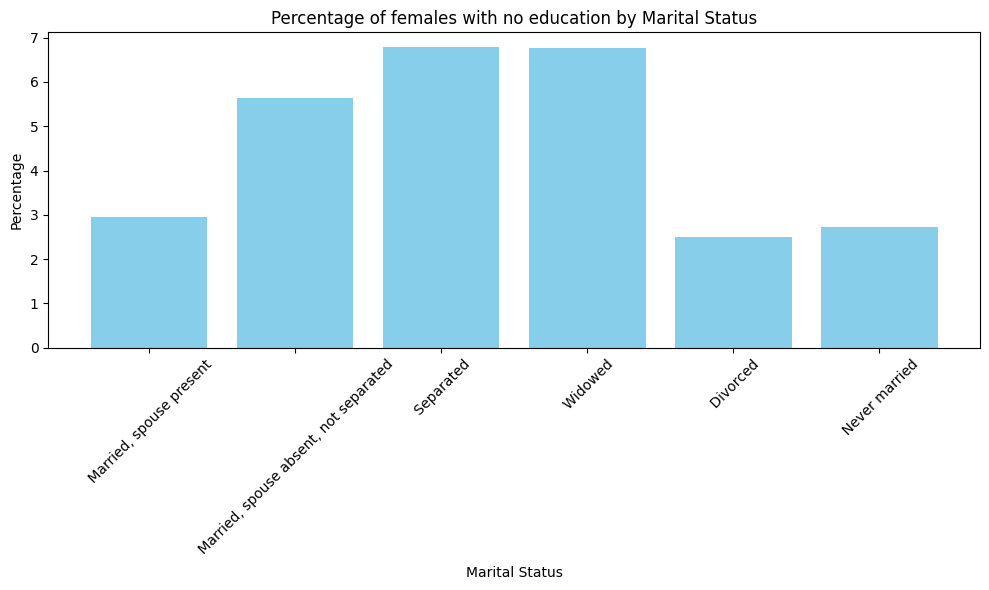

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


gender = ["male","female"]
for i in gender:
    mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash",
    database="CSCI_630_GA2"
    )
    cursor = mydb.cursor()
        
    # Query to select Marital_Status and Percentage
    query = f"""
    select Marital_Status,
    round(((None___8th_grade) / Total) * 100,2) AS Percentage from {i}_marital_status;
    """
    
    cursor.execute(query)
    result = cursor.fetchall()
    

    df = pd.DataFrame(result, columns=['Marital_Status', 'Percentage'])
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Marital_Status'], df['Percentage'], color='skyblue')
    plt.xlabel('Marital Status')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {i}s with no education by Marital Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    cursor.close()
    mydb.close()

In [5]:
column_names = column_names.split(", ")

SELECT `Male`, `Female` FROM table_3 WHERE id BETWEEN %s AND %s AND degree NOT IN (%s)


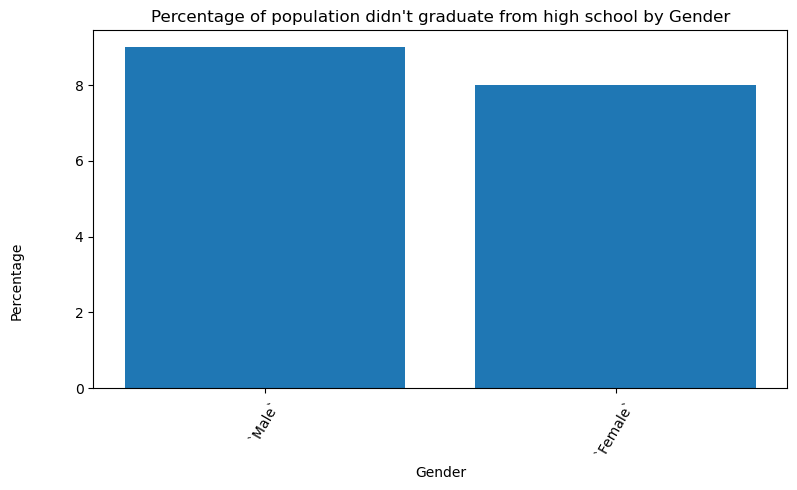

SELECT `25 to 34 years old`, `35 to 54 years old`, `55 years and older` FROM table_3 WHERE id BETWEEN %s AND %s AND degree NOT IN (%s)


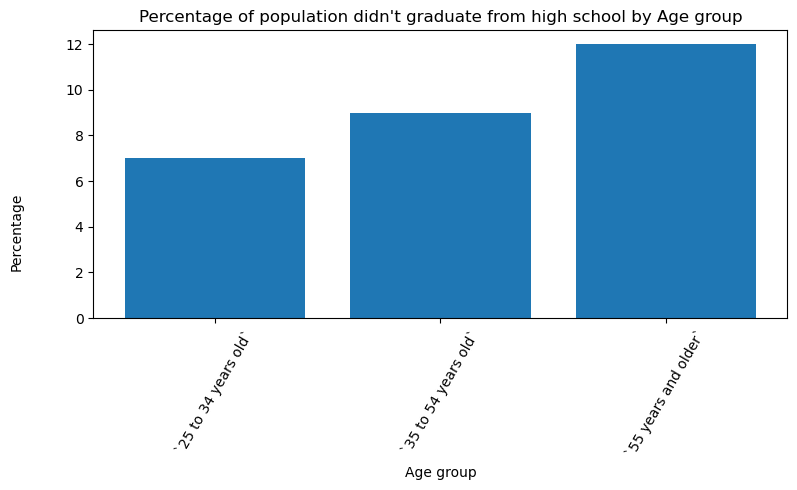

SELECT `White`, `Non-Hispanic White`, `Black`, `Asian`, `Hispanic (of any race)` FROM table_3 WHERE id BETWEEN %s AND %s AND degree NOT IN (%s)


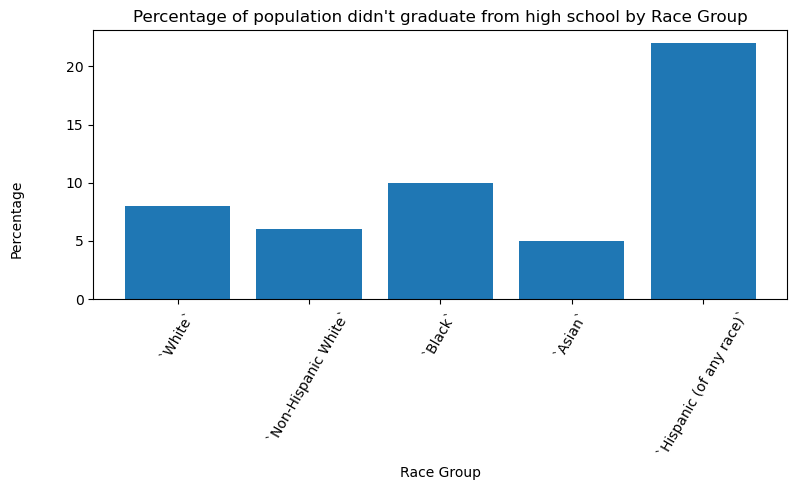

In [6]:
from matplotlib import pyplot as plt
column_differential = {"Gender": (2,4), "Age group": (4,7), "Race Group": (7,12)}
for category, column_location in column_differential.items():
    columns_to_select = ', '.join(map(str, column_names[column_location[0]:column_location[1]]))
    sql_query = f"SELECT {columns_to_select} FROM table_3 WHERE id BETWEEN %s AND %s AND degree NOT IN (%s)"
    parameters_to_passed = (2, 16, "12th grade, no diploma")
    print(sql_query)
    mycursor.execute(sql_query, parameters_to_passed)
    result = mycursor.fetchall()
    db.commit()
    # print(type(result))
    # for i in range(len(result)):
    # print(result[i])
    df_table3 = pd.DataFrame(result, columns=column_names[column_location[0]:column_location[1]])
    # df_table3.set_index(df_table3.columns[0], inplace=True)
    sum_row = df_table3.iloc[1:].sum()
    df_table3.loc['Sum'] = sum_row
    # table.insert(loc=3, column='Other', value=(table.iloc[:,0] - (table.iloc[:,1] + table.iloc[:,2])))
    # print(table)
    plt.figure(figsize=(8,5))
    labels = df_table3.columns.get_level_values(0).unique().tolist()
# column_locations = {"Gender": (1,3), "Age group": (3,6), "Race Group": (6,11)}
# for category, columns in column_locations.items():
    plt.bar(labels, df_table3.loc['Sum'])
    plt.xticks(rotation=60)
    plt.xlabel(category)
    plt.ylabel("Percentage")
    plt.title(f"Percentage of population didn't graduate from high school by {category}")
    ax = plt.gca()

# Set the position of the ylabel
# The first parameter is the x-coordinate (horizontal position)
# The second parameter is the y-coordinate (vertical position)
    ax.yaxis.set_label_coords(-0.1, 0.3)
# plt.title(f"Bachelor's degree by Age Groups ({sex})")
    plt.tight_layout()
    plt.show()

In [14]:
mycursor.execute("SELECT * FROM table_3")
results = mycursor.fetchall()
for i in range(len(results)):
    print(results[i])

('Total', 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1)
('Less than 1 year, no diploma', 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2)
('1st-4th grade, no diploma', 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 3, 3)
('5th-6th grade, no diploma', 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 6, 4)
('7th-8th grade, no diploma', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 5)
('9th grade, no diploma', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6)
('10th grade, no diploma', 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 7)
('11th grade, no diploma', 2, 2, 2, 1, 2, 2, 1, 1, 3, 0, 2, 8)
('12th grade, no diploma', 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 9)
('Less than 1 year, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10)
('1st-4th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11)
('5th-6th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12)
('7th-8th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13)
('9th grade, GED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('10th grade, GED', 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 15)
('11th grade, GED', 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 16)
(

SELECT `Male`, `Female` FROM table_3 WHERE id BETWEEN %s AND %s


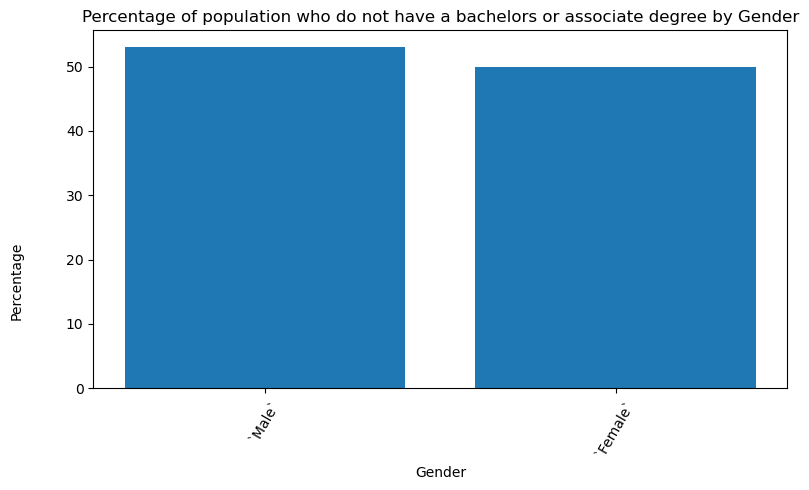

SELECT `25 to 34 years old`, `35 to 54 years old`, `55 years and older` FROM table_3 WHERE id BETWEEN %s AND %s


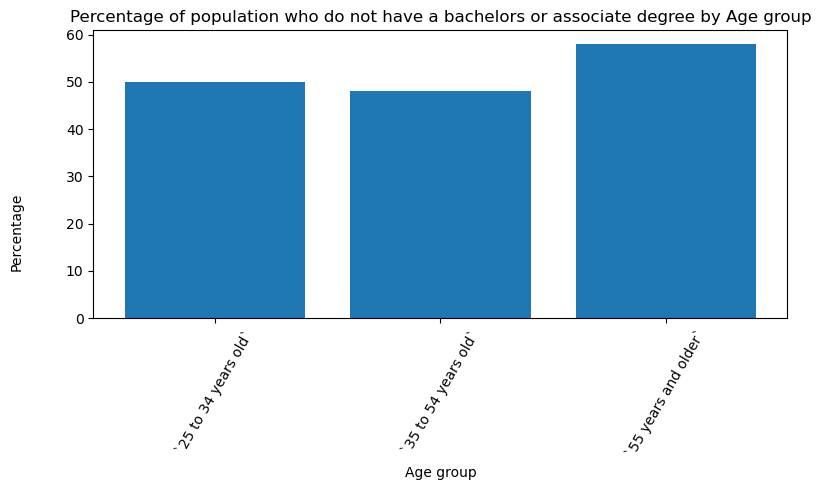

SELECT `White`, `Non-Hispanic White`, `Black`, `Asian`, `Hispanic (of any race)` FROM table_3 WHERE id BETWEEN %s AND %s


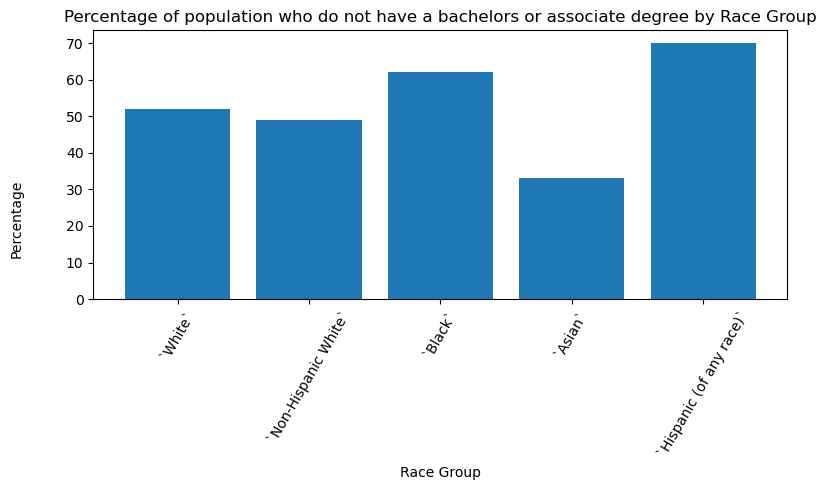

In [8]:
for category, column_location in column_differential.items():
    columns_to_select = ', '.join(map(str, column_names[column_location[0]:column_location[1]]))
    sql_query = f"SELECT {columns_to_select} FROM table_3 WHERE id BETWEEN %s AND %s"
    parameters_to_passed = (2, 23)
    print(sql_query)
    mycursor.execute(sql_query, parameters_to_passed)
    result = mycursor.fetchall()
    db.commit()
    # print(type(result))
    # for i in range(len(result)):
    # print(result[i])
    df_table3 = pd.DataFrame(result, columns=column_names[column_location[0]:column_location[1]])
    # df_table3.set_index(df_table3.columns[0], inplace=True)
    sum_row = df_table3.iloc[1:].sum()
    df_table3.loc['Sum'] = sum_row
    # table.insert(loc=3, column='Other', value=(table.iloc[:,0] - (table.iloc[:,1] + table.iloc[:,2])))
    # print(table)
    plt.figure(figsize=(8,5))
    labels = df_table3.columns.get_level_values(0).unique().tolist()
# column_locations = {"Gender": (1,3), "Age group": (3,6), "Race Group": (6,11)}
# for category, columns in column_locations.items():
    plt.bar(labels, df_table3.loc['Sum'])
    plt.xticks(rotation=60)
    plt.xlabel(category)
    plt.ylabel("Percentage")
    ax = plt.gca()
    plt.title(f"Percentage of population who do not have a bachelors or associate degree by {category}")
# Set the position of the ylabel
# The first parameter is the x-coordinate (horizontal position)
# The second parameter is the y-coordinate (vertical position)
    ax.yaxis.set_label_coords(-0.1, 0.3)
# plt.title(f"Bachelor's degree by Age Groups ({sex})")
    plt.tight_layout()
    plt.show()
    

In [ ]:
def edu_line_chart():
    genders = ["both", "male", "female"]
    
    for gender in genders:
        different_race_data = pd.DataFrame()
        for i in range(2,7):
            sql_query = f"SELECT `Bachelor's degree` FROM table_1_{i}_{gender}"
            parameters_to_passed = (2, 23)
            print(sql_query)
            mycursor.execute(sql_query, parameters_to_passed)
            result = mycursor.fetchall()
            db.commit()
            # df_title = pd.read_excel(f"Table1/table-1-{i}.xlsx", header=None)
            # current_race = df_title.iloc[3, 0]
        
            df = pd.DataFrame
            df.iloc[:, 0] = df.iloc[:, 0].replace("\t", "", regex=True) 
            df = df.iloc[location[0]:location[1]].copy()
            df.replace('Z', 0, inplace=True)
            df.iloc[1:,1:] = (df.iloc[1:,1:] / df.iloc[0,1:]) * 100
            df = df.drop([location[0] + 0, location[0] + 2]) 
            if i == 2:
                different_race_data["Age groups"] = df.iloc[:, 0]

            different_race_data[current_race] = df.iloc[:, 13]

        different_race_data.set_index(different_race_data.columns[0], inplace=True)
        print(different_race_data)
        plt.figure(figsize=(15, 10))
        #fig, ax = plt.subplots()
        #x = np.arange(len(different_race_data))
        #width = 0.1
        #fig, ax = plt.subplots()
        for i, c in enumerate(different_race_data.columns):
            plt.scatter(different_race_data.index, different_race_data[c], marker='o', label=c)
            #ax.bar(x + i * width, different_race_data[c], width, label=c)

        #ax.set_xticklabels(different_race_data.index)
        plt.xlabel("Age groups")
        plt.ylabel("Percentage of population")
        plt.title(f"Bachelor's degree by Age Groups ({sex})")
        plt.legend(prop={'size': 8}, loc='best', title="Different Races")
        plt.xticks(rotation=80)
        plt.tight_layout()
        plt.show()